<a href="https://colab.research.google.com/github/nehuengonz/Inteligencia-Artificial/blob/main/avila_TP_final_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import sklearn
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

avilatrain = "/content/avila-tr.txt"
avilatest = "/content/avila-ts.txt"

avilatrain = pd.read_csv(avilatrain,header = None)
avilatest = pd.read_csv(avilatest,header = None)


# Crear un diccionario para asignar valores a las letras
letras_a_numeros = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
#quito los espacios en blanco y las minusculas
avilatrain[10] = avilatrain[10].str.strip().str.upper()
# Suponiendo que la columna de clasificación se llama 'clasificacion'
avilatrain[10] = avilatrain[10].map(letras_a_numeros)

# Verificamos la conversión
avilatrain.to_csv('avilatrain_tranform.csv', index=False)
avilatrain_transform=pd.read_csv('avilatrain_tranform.csv')
#quito los espacios en blanco y las minusculas
avilatest[10] = avilatest[10].str.strip().str.upper()
# Suponiendo que la columna de clasificación se llama 'clasificacion'
avilatest[10] = avilatest[10].map(letras_a_numeros)

# Verificamos la conversión
avilatest.to_csv('avilatest_tranform.csv', index=False)
avilatest_transform=pd.read_csv('avilatest_tranform.csv')

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes=np.arange(12),
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Purples):
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Matriz de confusión normalizada')
    else:
        print('Matriz de confusión sin normalizar')
    print(cm)
    fig, ax = plt.subplots(figsize=(10, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Cifra predicha',
           xlabel='Cifra verdadera')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=3)

en este punto buscaba obtener el mayor accurancy posible,lo obtuve utilizando la siguiente red neuronal

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3530 - loss: 2.0804
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5110 - loss: 1.4499
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5535 - loss: 1.2846
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5873 - loss: 1.1772
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6071 - loss: 1.1046
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6354 - loss: 1.0175
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6435 - loss: 0.9868
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6393 - loss: 0.9820
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6420 - loss: 0.9650
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6595 - loss: 0.9223
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6686 - loss: 0.8925
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

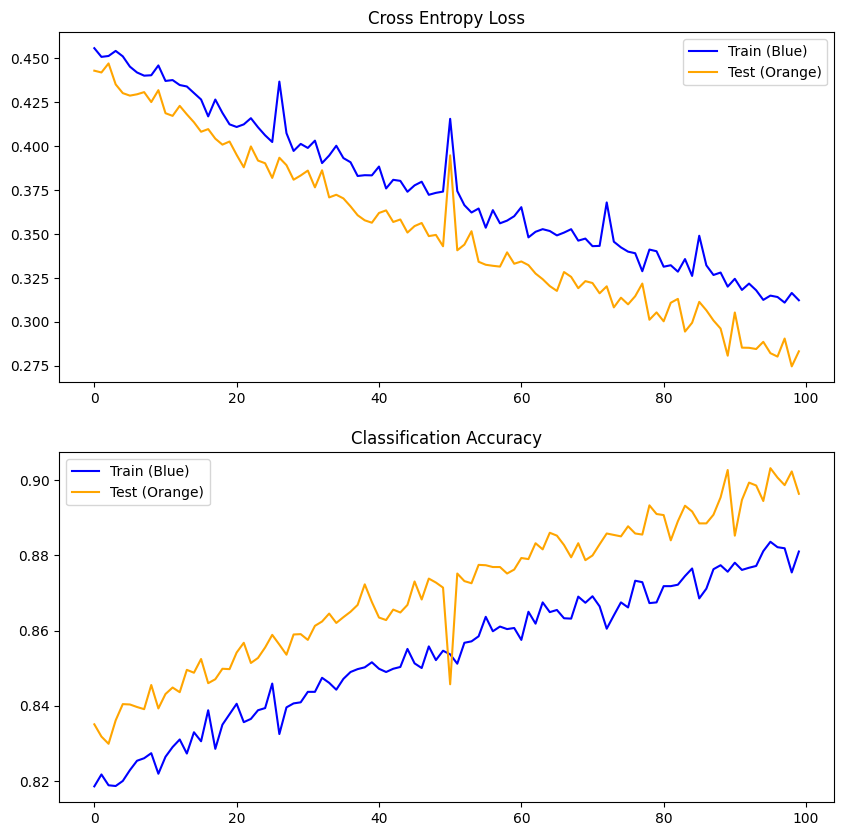

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Matriz de confusión normalizada
[[8.553e-01 0.000e+00 1.670e-03 8.351e-04 9.395e-03 1.067e-01 1.232e-02
  9.395e-03 1.253e-03 2.088e-04 2.714e-03 2.088e-04]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 9.485e-01 0.000e+00 2.062e-02 0.000e+00 0.000e+00
  3.093e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [5.666e-03 0.000e+00 2.833e-03 9.717e-01 1.983e-02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.808e-02 0.000e+00 9.515e-04 5.709e-03 9.524e-01 1.237e-02 0.000e+00
  3.806e-03 0.000e+00 0.000e+00 6.660e-03 0.000e+00]
 [6.545e-02 0.000e+00 0.000e+00 0.000e+00 1.178e-02 9.038e-01 1.309e-02
  5.890e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [7.657e-02 0.000e+00 0.000e+00 0.000e+00 4.640e-03 7.889e-02 8.399e-01
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [6.130e-02 0.000e+00 1.916e-03 0.000e+00 1.341e-02 

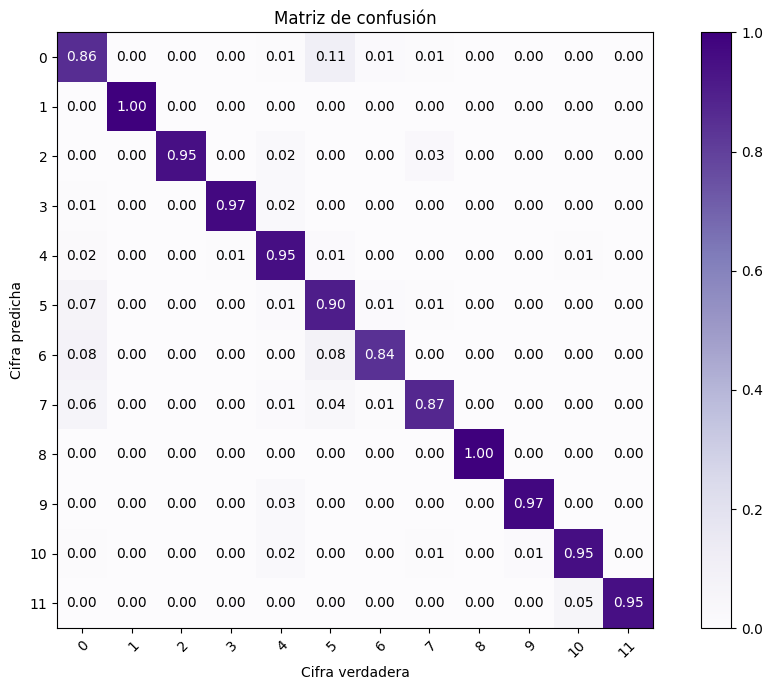

In [ ]:

from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.constraints import MaxNorm
from sklearn.metrics import confusion_matrix
modelo = Sequential()
modelo.add(Flatten())
modelo.add(Dense(units=10, activation='relu', input_dim=10,kernel_constraint=MaxNorm(5)))
#modelo.add(Dense(units=20, activation='relu'))
#modelo.add(Dropout(0.1))
modelo.add(Dense(units=30, activation='relu',kernel_constraint=MaxNorm(5)))
#modelo.add(Dropout(0.1))
modelo.add(Dense(units=40, activation='relu',kernel_constraint=MaxNorm(5)))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=12, activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.01)

modelo.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Isolate the first 10 features for training and testing
avilatrain_transform = avilatrain_transform.iloc[:10430]
avilatest_transform = avilatest_transform.iloc[:10430]
trainX = avilatrain_transform.iloc[:, 0:10]  # Select the first 10 columns for input
testX = avilatest_transform.iloc[:, 0:10]   # Select the first 10 columns for input
trainY = avilatrain_transform.iloc[:,10]
testY = avilatest_transform.iloc[:,10]

# One-Hot encode the target variable with sparse output
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

# Train the model with the correct input
modelo.fit(trainX, trainY, epochs=100)

def matrizdeconfusion(redneuronalentrenada,conjunto=testX, targetsonehot=testY, normalizar=False):
    puntajes = redneuronalentrenada.predict(conjunto)
    prediccion =np.zeros(len(conjunto),dtype=int)
    for x in range(1,len(conjunto)):
        prediccion[x] = np.argmax(puntajes[x])
    plot_confusion_matrix(prediccion, np.argmax(targetsonehot, axis= 1), normalize=normalizar, title= "Matriz de confusión")
    plt.show()

def evaluar_modelo_simple(dataX,dataY,modelo,estadoaleatorio=1,epocas=100):
	scores, histories= list(),list()
	model = modelo
	history = model.fit(trainX, trainY, epochs=epocas, batch_size=32, validation_data=(testX, testY), verbose=1)
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
	scores.append(acc)
	histories.append(history)
	return scores, histories, model

scores, histories, entrenado = evaluar_modelo_simple(trainX,trainY, modelo, epocas=100)

def resultados(histories):
    for i in range(len(histories)):
        # graficar loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.legend(['Train (Blue)', 'Test (Orange)'])
        # graficar accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.legend(['Train (Blue)', 'Test (Orange)'])
    plt.show()


plt.rcParams['figure.figsize'] = [10, 10]
resultados(histories)

matrizdeconfusion(entrenado,normalizar=True)

ahora que consegui un buen acurrancy busco que los datos de entrenamiento y de testing se crucen, para que no halla overfitting, utilizo max-norm regularization, utilizo funciones sigmoideales en las capas internas, agrego un drop out en la ultima capa y agrego un learning rate

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4039 - loss: 2.1663
Epoch 2/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4165 - loss: 1.8996
Epoch 3/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4176 - loss: 1.8527
Epoch 4/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4140 - loss: 1.8365
Epoch 5/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4064 - loss: 1.8330
Epoch 6/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4187 - loss: 1.8034
Epoch 7/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4055 - loss: 1.8060
Epoch 8/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4038 - loss: 1.8080
Epoch 9/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4079 - loss: 1.7905
Epoch 10/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4088 - loss: 1.7737
Epoch 11/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4084 - loss: 1.7562
Epoch 12/70
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

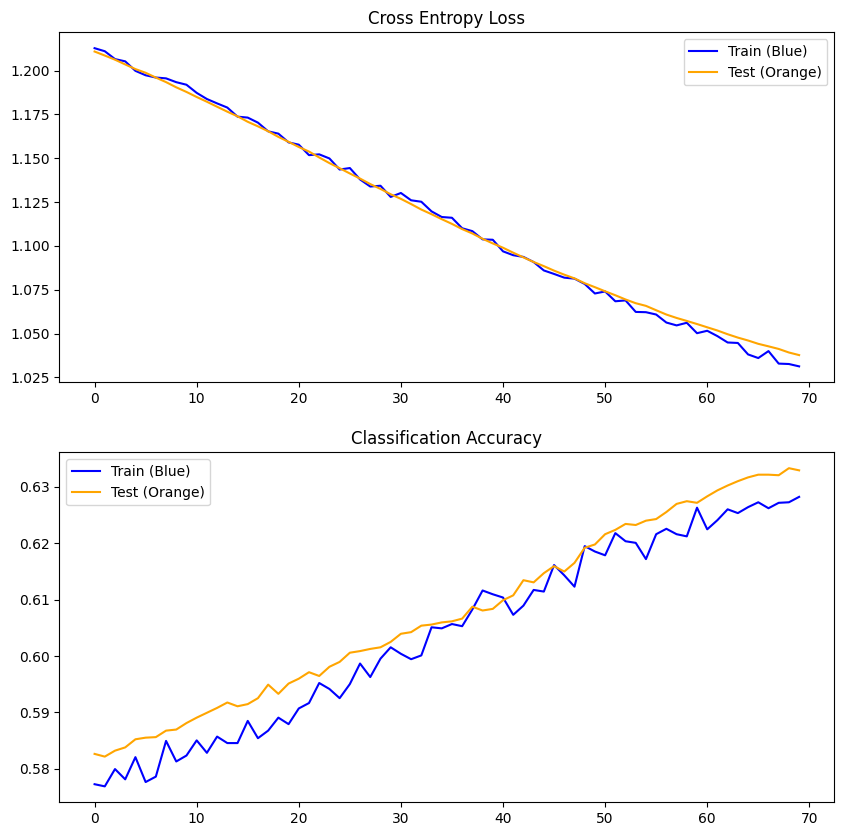

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<ipython-input-47-1e3598bd9a07>:13: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Matriz de confusión normalizada
[[6.154e-01 8.030e-04 5.300e-03 2.987e-02 3.742e-02 2.359e-01 2.586e-02
  3.035e-02 5.621e-03 3.533e-03 5.621e-03 4.336e-03]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan]
 [      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan]
 [1.043e-01 0.000e+00 3.693e-02 1.108e-01 5.518e-01 4.417e-02 3.259e-02
  3.765e-02 7.965e-03 1.665e-02 4.924e-02 7.965e-03]
 [2.914e-01 0.000e+00 2.222e-02 9.877e-03 4.074e-02 4.593e-01 8.889e-02
  8.395e-02 0.000e+00 0.000e+00 3.704e-03 0.000e+00]
 [1.502e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.974e-01 5.794e-01
  6.009e-02 4.292e-03 0.000e+00 0.000e+00 8.584e-03]
 [9.630e-02 0.000e+00 0.000e+00 1.111e-02 6.667e-02 2.222e-02 1.000e-01
  6.926e-01 0.000e+00

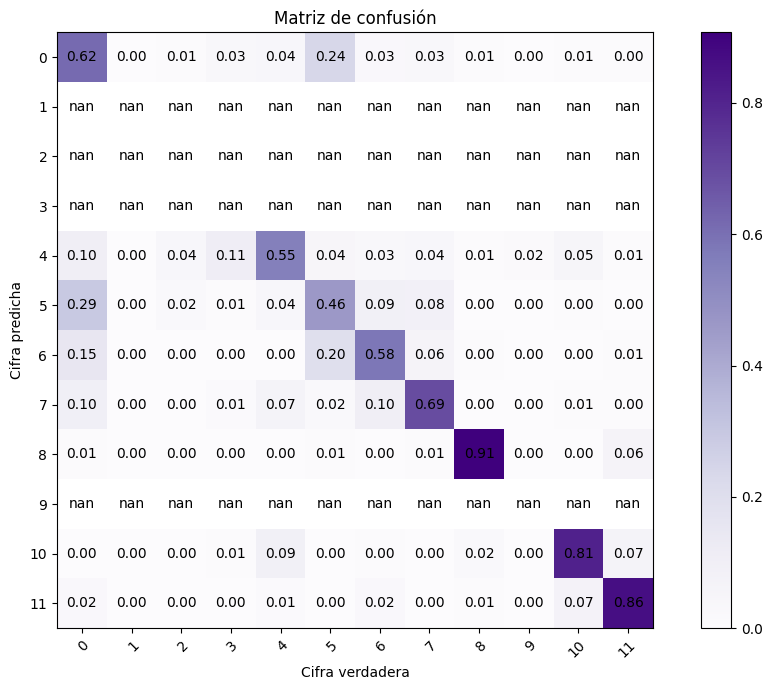

In [ ]:
modelo = Sequential()
modelo.add(Flatten())
modelo.add(Dense(units=10, activation='relu', input_dim=10,kernel_constraint=MaxNorm(5)))
#modelo.add(Dense(units=20, activation='relu'))
#modelo.add(Dropout(0.1))
modelo.add(Dense(units=30, activation='sigmoid',kernel_constraint=MaxNorm(5)))
#modelo.add(Dropout(0.1))
#modelo.add(Dense(units=40, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dense(units=50, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=12, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.0001)

modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Isolate the first 10 features for training and testing
avilatrain_transform = avilatrain_transform.iloc[:10430]
avilatest_transform = avilatest_transform.iloc[:10430]
trainX = avilatrain_transform.iloc[:, 0:10]  # Select the first 10 columns for input
testX = avilatest_transform.iloc[:, 0:10]   # Select the first 10 columns for input
trainY = avilatrain_transform.iloc[:,10]
testY = avilatest_transform.iloc[:,10]

# One-Hot encode the target variable with sparse output
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

# Train the model with the correct input
modelo.fit(trainX, trainY, epochs=70)

scores, histories, entrenado = evaluar_modelo_simple(trainX,trainY, modelo, epocas=70)

plt.rcParams['figure.figsize'] = [10, 10]
resultados(histories)

matrizdeconfusion(entrenado,normalizar=True)

despues de encontrar un cruce entre los datos de entrenamiento y los datos de testing, la idea es volver a mejorar el acurrancy, quite el learning rate y disminui la cantidad de neuronas en la anteultima capa de 50 a 40

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2941 - loss: 2.1755
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4160 - loss: 1.7540
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4686 - loss: 1.5549
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: 1.4560
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5148 - loss: 1.3955
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5344 - loss: 1.3404
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5369 - loss: 1.3221
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5588 - loss: 1.2534
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5690 - loss: 1.2143
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5720 - loss: 1.2047
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5835 - loss: 1.1473
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

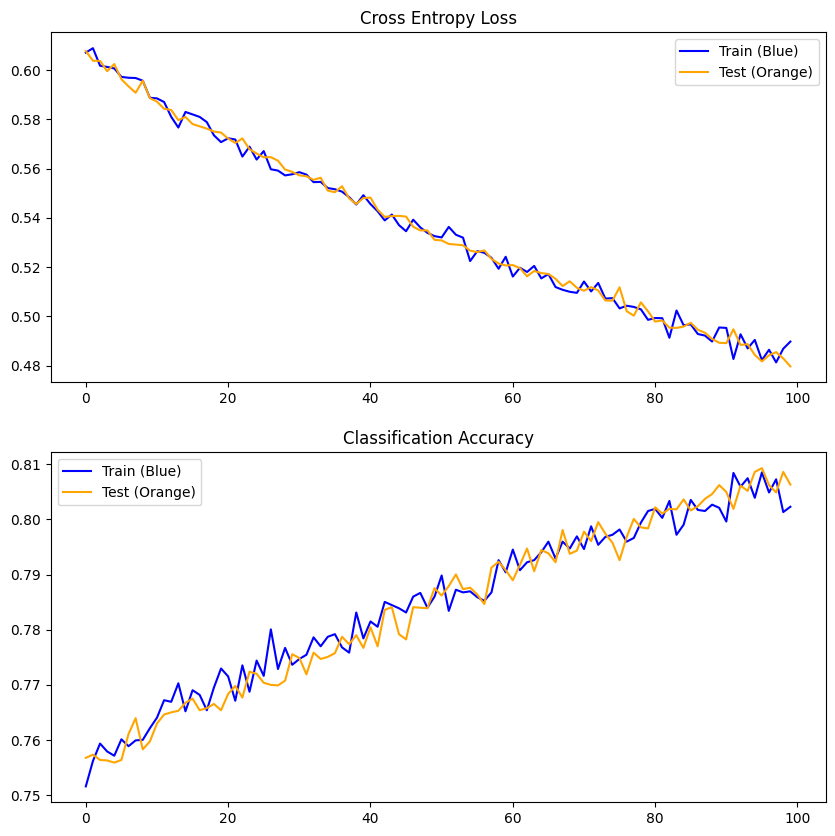

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión normalizada
[[7.969e-01 0.000e+00 6.671e-03 6.671e-03 2.991e-02 1.089e-01 1.937e-02
  2.647e-02 2.582e-03 6.456e-04 1.506e-03 4.304e-04]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 8.667e-01 6.667e-02 6.667e-02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.403e-02 0.000e+00 4.088e-02 8.428e-01 5.346e-02 1.258e-02 0.000e+00
  0.000e+00 0.000e+00 3.145e-03 3.145e-03 0.000e+00]
 [7.352e-02 0.000e+00 2.922e-02 4.336e-02 7.936e-01 1.131e-02 8.483e-03
  8.483e-03 0.000e+00 1.697e-02 1.037e-02 4.713e-03]
 [1.893e-01 0.000e+00 0.000e+00 2.784e-03 1.670e-02 7.584e-01 2.506e-02
  7.795e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.268e-01 0.000e+00 0.000e+00 2.347e-03 2.347e-02 1.315e-01 6.925e-01
  2.347e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.598e-01 0.000e+00 3.945e-03 0.000e+00 6.903e-02 

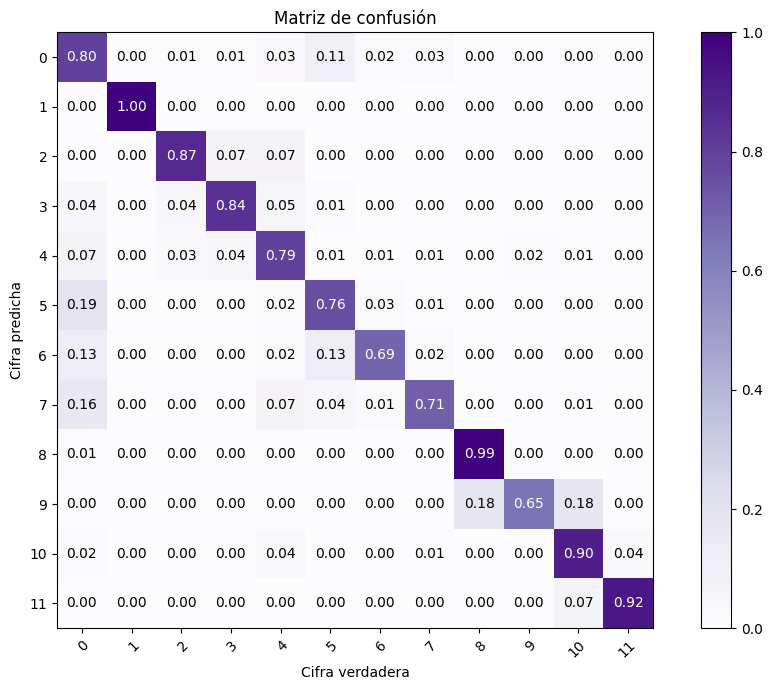

In [ ]:
modelo = Sequential()
#modelo.add(Flatten())
modelo.add(Dense(units=10, activation='relu', input_dim=10,kernel_constraint=MaxNorm(5)))
#modelo.add(Dense(units=20, activation='relu'))
#modelo.add(Dropout(0.1))
modelo.add(Dense(units=30, activation='sigmoid',kernel_constraint=MaxNorm(5)))
#modelo.add(Dropout(0.1))
#modelo.add(Dense(units=40, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dense(units=40, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=12, activation='softmax'))
opt = keras.optimizers.Adam()

modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Isolate the first 10 features for training and testing
avilatrain_transform = avilatrain_transform.iloc[:10430]
avilatest_transform = avilatest_transform.iloc[:10430]
trainX = avilatrain_transform.iloc[:, 0:10]  # Select the first 10 columns for input
testX = avilatest_transform.iloc[:, 0:10]   # Select the first 10 columns for input
trainY = avilatrain_transform.iloc[:,10]
testY = avilatest_transform.iloc[:,10]

# One-Hot encode the target variable with sparse output
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

# Train the model with the correct input
modelo.fit(trainX, trainY, epochs=100)

scores, histories, entrenado = evaluar_modelo_simple(trainX,trainY, modelo, epocas=100)

plt.rcParams['figure.figsize'] = [10, 10]
resultados(histories)

matrizdeconfusion(entrenado,normalizar=True)

El resultado me parece muy decente llegando a un acurrancy de 80 y habiendo un cruce entre los datos de testeo y los de entrenamiento

probe con otro metodo de optimizacion pero disminuia el acurrancy bastante, tambien agregando mas capas, ocurria lo mismo, agregando mas neuronas mejoraba la acurrancy pero los datos de testing y los de entrenamiento ya no se cruzaban

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4086 - loss: 1.8902
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4995 - loss: 1.4865
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5542 - loss: 1.2903
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5822 - loss: 1.1923
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5943 - loss: 1.1456
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6056 - loss: 1.0762
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6155 - loss: 1.0277
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6438 - loss: 0.9864
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6535 - loss: 0.9501
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6685 - loss: 0.9254
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6609 - loss: 0.9295
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

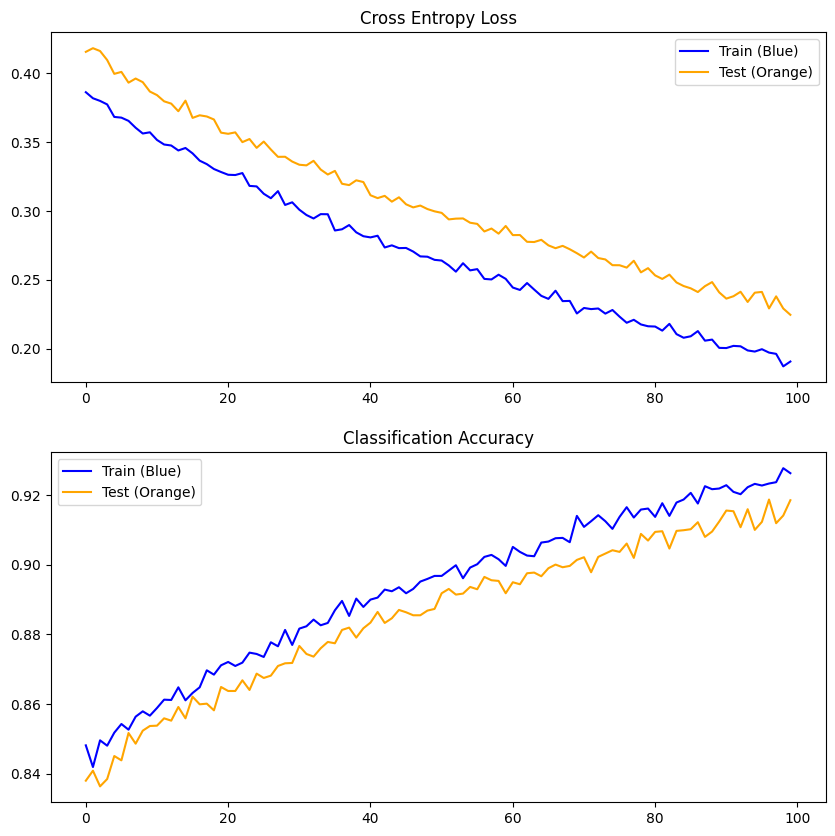

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión normalizada
[[9.232e-01 0.000e+00 0.000e+00 2.101e-03 5.604e-03 4.856e-02 8.872e-03
  7.938e-03 1.634e-03 2.335e-04 1.634e-03 2.335e-04]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 9.327e-01 9.615e-03 0.000e+00 2.885e-02 0.000e+00
  2.885e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [8.721e-03 0.000e+00 5.814e-03 9.593e-01 2.616e-02 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.274e-02 0.000e+00 1.820e-03 1.183e-02 9.463e-01 6.369e-03 2.730e-03
  2.730e-03 0.000e+00 0.000e+00 1.001e-02 5.460e-03]
 [1.127e-01 0.000e+00 5.076e-04 0.000e+00 5.584e-03 8.604e-01 1.269e-02
  6.599e-03 5.076e-04 0.000e+00 0.000e+00 1.015e-03]
 [8.108e-02 0.000e+00 0.000e+00 0.000e+00 2.252e-03 5.631e-02 8.536e-01
  6.757e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [8.972e-02 0.000e+00 0.000e+00 0.000e+00 7.477e-03 

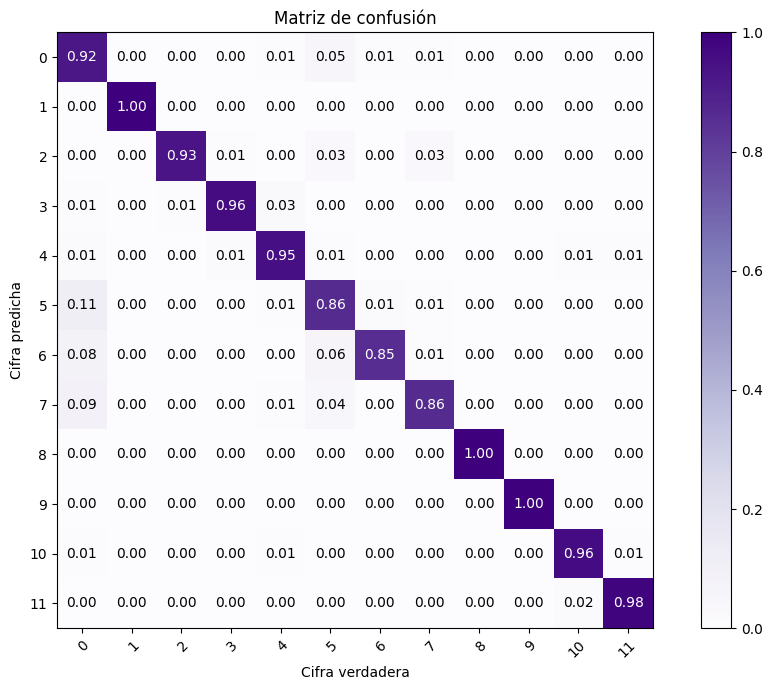

In [ ]:
modelo = Sequential()
#modelo.add(Flatten())
modelo.add(Dense(units=20, activation='relu', input_dim=10,kernel_constraint=MaxNorm(5)))
#modelo.add(Dense(units=20, activation='relu'))
#modelo.add(Dropout(0.1))
modelo.add(Dense(units=60, activation='sigmoid',kernel_constraint=MaxNorm(5)))
#modelo.add(Dropout(0.1))
#modelo.add(Dense(units=40, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dense(units=80, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=12, activation='softmax'))
opt = keras.optimizers.Adam()

modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Isolate the first 10 features for training and testing
avilatrain_transform = avilatrain_transform.iloc[:10430]
avilatest_transform = avilatest_transform.iloc[:10430]
trainX = avilatrain_transform.iloc[:, 0:10]  # Select the first 10 columns for input
testX = avilatest_transform.iloc[:, 0:10]   # Select the first 10 columns for input
trainY = avilatrain_transform.iloc[:,10]
testY = avilatest_transform.iloc[:,10]

# One-Hot encode the target variable with sparse output
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

# Train the model with the correct input
modelo.fit(trainX, trainY, epochs=100)

scores, histories, entrenado = evaluar_modelo_simple(trainX,trainY, modelo, epocas=100)

plt.rcParams['figure.figsize'] = [10, 10]
resultados(histories)

matrizdeconfusion(entrenado,normalizar=True)

RESULTADO FINAL

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2945 - loss: 2.1718
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4308 - loss: 1.7142
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4892 - loss: 1.5235
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5435 - loss: 1.3722
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5586 - loss: 1.3182
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5682 - loss: 1.2926
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5797 - loss: 1.2283
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5839 - loss: 1.2003
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6019 - loss: 1.1503
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5992 - loss: 1.1497
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6113 - loss: 1.1099
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

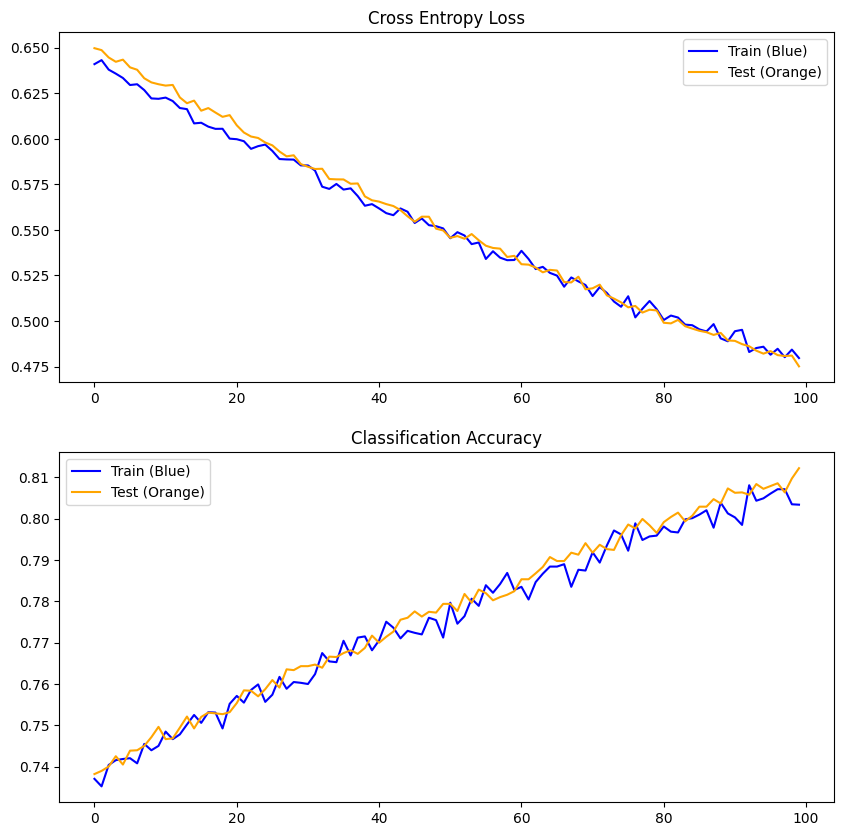

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de confusión normalizada
[[8.025e-01 0.000e+00 5.185e-03 4.537e-03 2.484e-02 1.097e-01 1.966e-02
  2.657e-02 3.672e-03 1.728e-03 1.080e-03 4.321e-04]
 [0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.053e-01 0.000e+00 7.368e-01 0.000e+00 7.895e-02 0.000e+00 0.000e+00
  3.947e-02 0.000e+00 0.000e+00 0.000e+00 3.947e-02]
 [1.021e-01 0.000e+00 1.832e-02 7.487e-01 1.309e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [4.451e-02 0.000e+00 1.484e-02 4.451e-02 8.338e-01 9.891e-03 1.780e-02
  8.902e-03 0.000e+00 3.956e-03 1.682e-02 4.946e-03]
 [1.996e-01 0.000e+00 5.365e-04 5.365e-04 1.770e-02 7.414e-01 3.326e-02
  6.974e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [9.651e-02 0.000e+00 0.000e+00 0.000e+00 3.485e-02 1.367e-01 7.131e-01
  1.877e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.351e-01 0.000e+00 0.000e+00 0.000e+00 3.268e-02 

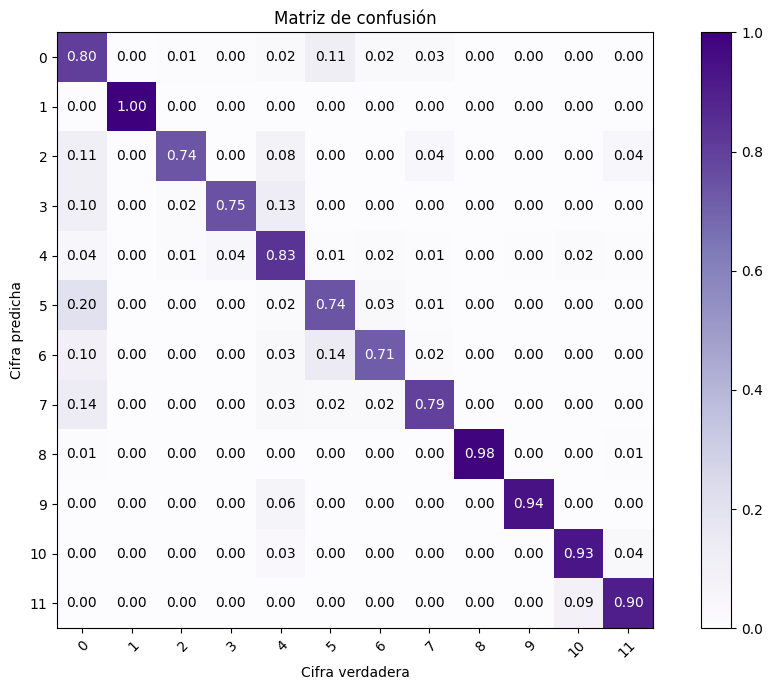

In [ ]:
modelo = Sequential()
modelo.add(Flatten())
modelo.add(Dense(units=10, activation='relu', input_dim=10,kernel_constraint=MaxNorm(5)))
modelo.add(Dense(units=30, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dense(units=40, activation='sigmoid',kernel_constraint=MaxNorm(5)))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=12, activation='softmax'))
opt = keras.optimizers.Adam()

modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Isolate the first 10 features for training and testing
avilatrain_transform = avilatrain_transform.iloc[:10430]
avilatest_transform = avilatest_transform.iloc[:10430]
trainX = avilatrain_transform.iloc[:, 0:10]  # Select the first 10 columns for input
testX = avilatest_transform.iloc[:, 0:10]   # Select the first 10 columns for input
trainY = avilatrain_transform.iloc[:,10]
testY = avilatest_transform.iloc[:,10]

# One-Hot encode the target variable with sparse output
OneHotEncoder = LabelBinarizer()
trainY = OneHotEncoder.fit_transform(trainY)
testY = OneHotEncoder.fit_transform(testY)

# Train the model with the correct input
modelo.fit(trainX, trainY, epochs=100)

scores, histories, entrenado = evaluar_modelo_simple(trainX,trainY, modelo, epocas=100)

plt.rcParams['figure.figsize'] = [10, 10]
resultados(histories)

matrizdeconfusion(entrenado,normalizar=True)